In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Começamos importando as bibliotecas e vendo como é formado nosso dataframe.

In [2]:
df_boston = pd.read_csv('BostonHousing.csv', index_col=0)
df_boston.head()

,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,,,,,,,,,,,,,
0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Aqui nós dividimos nosso dataframe em um subconjunto que 30% será teste e 70% treinamento.

In [3]:
# gerando subconjuntos de dados de treinamento e teste com 70% dos dados para treinamento e 30% para teste
X_train, X_test, y_train, y_test = train_test_split(df_boston.drop('medv', axis=1), df_boston['medv'], test_size=0.3, random_state=42)

Algoritmo que busca o atributo com maior correlação ao target de um dataframe.

In [4]:
# A função recebe o dataframe e o atributo alvo como parâmetro e retorna o atributo com maior correlação.
# A função faz uma matriz de correlação usando método de pearson, faz o valor absoluto e depois disso ordena os valores
# Depois de ordenado, o segundo valor dessa lista ( porque o primeiro é 1 sempre)  vai ser o atributo com maior correlação.

def get_maior_corr(df, target):
    return df.corr(method='pearson')[target].abs().sort_values(ascending=False).index[1]

In [5]:
maior_corr_col = get_maior_corr(df_boston, 'medv')
print("A coluna com a maior correlação é:", maior_corr_col)

A coluna com a maior correlação é: lstat


Cálculo das métricas ensinadas nos slides

In [6]:
def RSS( y_real, y_pred ):
    return np.sum( ( y_real - y_pred ) ** 2 )

def RSE( y_real, y_pred ):
    n = len( y_real )
    return np.sqrt( RSS( y_real, y_pred ) / ( n - 2 ) )

def SE_Theta0( X_real, y_real, y_pred ):
    n = len( y_real )
    x_mean = np.mean( X_real )
    return RSE( y_real, y_pred ) * np.sqrt( 1 / n + x_mean ** 2 / np.sum( ( X_real - x_mean ) ** 2 ) )

def SE_Theta1( X_real, y_real, y_pred ):
    n = len( y_real )
    x_mean = np.mean( X_real )
    return RSE( y_real, y_pred ) / np.sqrt( np.sum( ( X_real - x_mean ) ** 2 ) )

# importando o modelo de regressão linear
from sklearn import linear_model

def calculate_metrics( X_train, X_test, y_train, y_test ):

    reg = linear_model.LinearRegression()
    reg.fit( X_train, y_train )

    y_pred = reg.predict( X_test )
    N = len( X_train )

    coeficiente = reg.coef_[0][0]
    intercept = reg.intercept_[0]
    equation = f"y = {coeficiente:.5f}*X + {intercept:.5f}"
    rss = RSS( y_test, y_pred )
    rse = RSE( y_test, y_pred )
    se_theta0 = SE_Theta0( X_test, y_test, y_pred )
    se_theta1 = SE_Theta1( X_test, y_test, y_pred )
    r_squared = reg.score( X_test, y_test )

    return {
        'Coeficiente': coeficiente,
        'Intercept': intercept,
        'Equação': equation,
        'RSS': rss,
        'RSE': rse,
        'SE_Theta0': se_theta0,
        'SE_Theta1': se_theta1,
        'R-squared': r_squared
    }


Escolhemos apenas o atributo com maior correlação e o target, para fazermos uma regressão linear mais otimizada.

In [7]:
# Regressão de BostonHousing
data_1 = df_boston.values

X, y = data_1[:, -2].reshape( ( -1, 1 ) ), data_1[:, -1].reshape( ( -1, 1 ) )


Faz 30 amostras de regressão linear para analisarmos os resultados de forma ampla.

In [8]:
new_df_1 = pd.DataFrame( columns=['Coeficiente', 'Intercept', 'Equação', 'RSS', 'RSE', 'SE_Theta0', 'SE_Theta1', 'R-squared'] )

for i in range( 30 ):
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3 )

    metrics = calculate_metrics( X_train, X_test, y_train, y_test)
    new_df_1 = pd.concat( [new_df_1, pd.DataFrame( metrics, index=[0] )], ignore_index=True )

new_df_1.to_csv( 'regressões_Boston_advertising.csv', index=False )
new_df_1.head()

,Coeficiente,Intercept,Equação,RSS,RSE,SE_Theta0,SE_Theta1,R-squared
0,-0.929384,34.258787,y = -0.92938*X + 34.25879,6700.100989,6.683363,1.079096,0.071328,0.561634
1,-0.964184,34.727163,y = -0.96418*X + 34.72716,5537.504036,6.075911,0.984090,0.067202,0.554685
2,-0.957946,34.679537,y = -0.95795*X + 34.67954,5663.628008,6.144715,1.012072,0.070812,0.535317
3,-0.924650,33.905608,y = -0.92465*X + 33.90561,6808.187016,6.737055,1.141332,0.080216,0.507340
4,-0.878649,33.558454,y = -0.87865*X + 33.55845,6649.366975,6.658011,1.098326,0.075795,0.579704


Plota nossos resultados

In [9]:
import matplotlib.pyplot as plt

def plot_linear_regression(df, new_df, x_column, y_column):
    a0 = new_df['Intercept'].mean()
    a1 = new_df['Coeficiente'].mean()

    x = np.linspace(df[x_column].min(), df[x_column].max())
    y = a1 * x + a0

    plt.figure(figsize=(10, 5))
    plt.plot(x, y, color='blue', label='Regressão')
    plt.scatter(df[x_column], df[y_column], color='red', marker='o', label='Dados')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title('Regressão Linear')
    plt.legend(loc='upper center')
    plt.grid(True)
    plt.show()

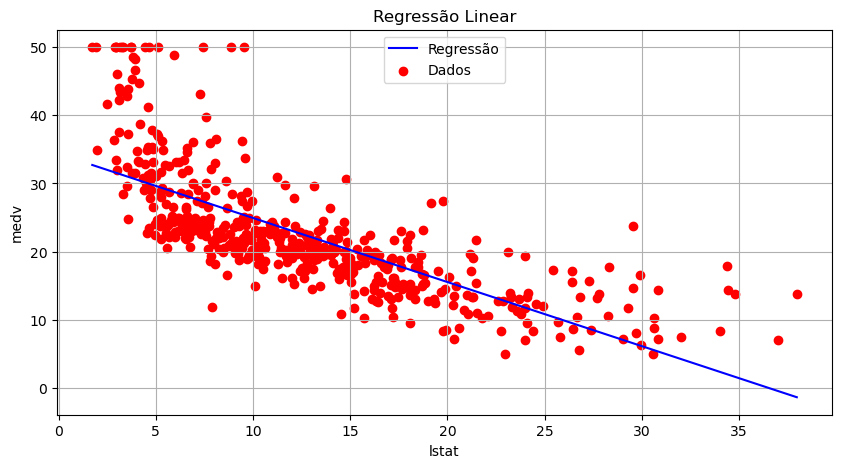

In [10]:
# Gráfico da Regressão Linear de BostonHousing
plot_linear_regression(df_boston, new_df_1, 'lstat', 'medv')

Repete o mesmo método para o outro dataset

In [11]:
df_advertising = pd.read_csv('Advertising.csv', index_col=0)

df_advertising.head()

,radio,newspaper,sales
TV,,,
230.1,37.8,69.2,22.1
44.5,39.3,45.1,10.4
17.2,45.9,69.3,9.3
151.5,41.3,58.5,18.5
180.8,10.8,58.4,12.9


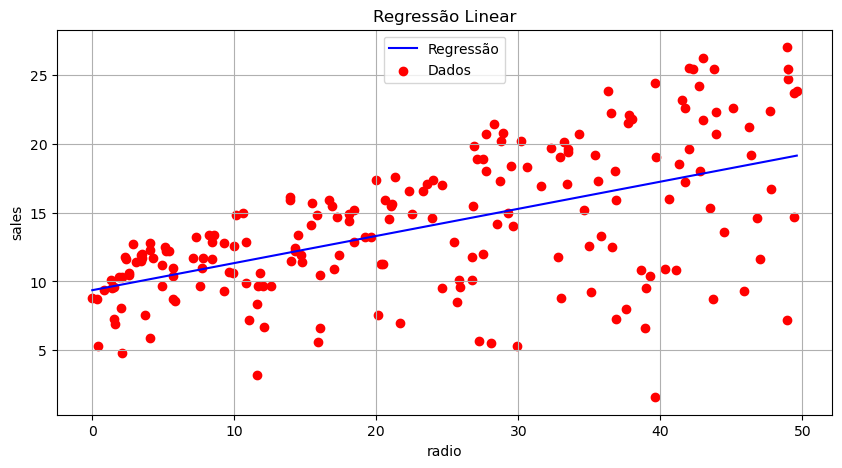

In [12]:
data_2 = df_advertising.values

# o atributo com maior correlacao a sales é TV, então:
X, y = data_2[:, 0].reshape( ( -1, 1 ) ), data_2[:, -1].reshape( ( -1, 1 ) )

new_df_2 = pd.DataFrame( columns=['Coeficiente', 'Intercept', 'Equação', 'RSS', 'RSE', 'SE_Theta0', 'SE_Theta1', 'R-squared'] )

for i in range( 30 ):
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3 )

    metrics = calculate_metrics( X_train, X_test, y_train, y_test)
    new_df_2 = pd.concat( [new_df_2, pd.DataFrame(metrics, index=[0] )], ignore_index=True )

new_df_2.to_csv( 'regressões_advertising.csv', index=False )
new_df_2.head()

# Gráfico da Regressão Linear de Advertising
plot_linear_regression(df_advertising, new_df_2, 'radio', 'sales')